In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#Get the data
data_energia_1 = pd.read_csv("energia_202109-202112.csv")
data_energia_2 = pd.read_csv("energia_202201-202212.csv")
data_meteo_1 = pd.read_csv("meteo_202109-202112.csv")
data_meteo_2 = pd.read_csv("meteo_202201-202212.csv")

ANÁLISE PARA DATASETS INDIVIDUAIS
----------------------------------------------------------------------------------

In [3]:
data_files = [
    ('energia_202109-202112.csv', 'Energia - Sep 2021 to Dec 2021'),
    ('energia_202201-202212.csv', 'Energia - Jan 2022 to Dec 2022'),
    ('meteo_202109-202112.csv', 'Meteo - Sep 2021 to Dec 2021'),
    ('meteo_202201-202212.csv', 'Meteo - Jan 2022 to Dec 2022')
]
'''
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 14))
fig.suptitle("Missing Data Heatmaps")

# Loop to load and display information and create heatmaps for each dataset
for i, (data_file, dataset_name) in enumerate(data_files):
    data = pd.read_csv(data_file)

    print("\n")
    print(f"Columns of the {dataset_name} dataset:")
    print(data.columns)
    print("\n")
    print(f"Information for the {dataset_name} dataset:")
    print(data.info())
    print("\n")
    print(f"First few rows of the {dataset_name} dataset:")
    print(data.head())
    print("\n")
    print(f"Number of missing values in the {dataset_name} dataset:")
    print(data.isnull().sum())
    print("--------------------------------------------------------------------")

    # Create heatmap
    ax = axes[i // 2, i % 2]
    sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)
    ax.set_title(dataset_name)

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
'''

'\n# Create subplots\nfig, axes = plt.subplots(2, 2, figsize=(12, 14))\nfig.suptitle("Missing Data Heatmaps")\n\n# Loop to load and display information and create heatmaps for each dataset\nfor i, (data_file, dataset_name) in enumerate(data_files):\n    data = pd.read_csv(data_file)\n\n    print("\n")\n    print(f"Columns of the {dataset_name} dataset:")\n    print(data.columns)\n    print("\n")\n    print(f"Information for the {dataset_name} dataset:")\n    print(data.info())\n    print("\n")\n    print(f"First few rows of the {dataset_name} dataset:")\n    print(data.head())\n    print("\n")\n    print(f"Number of missing values in the {dataset_name} dataset:")\n    print(data.isnull().sum())\n    print("--------------------------------------------------------------------")\n\n    # Create heatmap\n    ax = axes[i // 2, i % 2]\n    sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap=\'viridis\', ax=ax)\n    ax.set_title(dataset_name)\n\n# Adjust layout and display\nplt.tig

MERGE DATASETS
----------------------------------------

In [4]:
# Concatenate data
data_energia = pd.concat([data_energia_1, data_energia_2], ignore_index=True)
data_meteo = pd.concat([data_meteo_1, data_meteo_2], ignore_index=True)



Columns of the Energia - Concatenated Data dataset:
Index(['Data', 'Hora', 'Normal (kWh)', 'Horario Economico (kWh)',
       'Autoconsumo (kWh)', 'Injecao na rede (kWh)'],
      dtype='object')


Information for the Energia - Concatenated Data dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horario Economico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injecao na rede (kWh)    3239 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 516.5+ KB
None


First few rows of the Energia - Concatenated Data dataset:
         Data  Hora  Normal (kWh)  Horario Economico (kWh)  Autoconsumo (kW

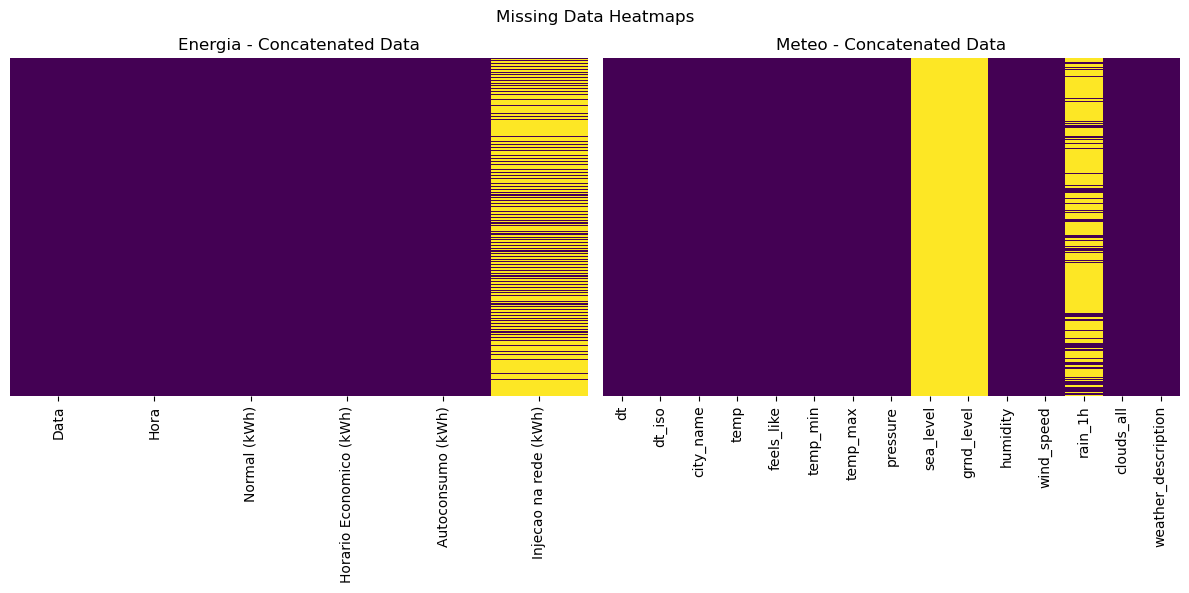

Nunique:



dt                     11688
dt_iso                 11688
city_name                  1
temp                    2423
feels_like              2702
temp_min                 488
temp_max                 550
pressure                  41
sea_level                  0
grnd_level                 0
humidity                  82
wind_speed               771
rain_1h                  371
clouds_all               101
weather_description        8
dtype: int64

In [5]:
# Define datasets and their corresponding names
datasets = [
    (data_energia, 'Energia - Concatenated Data'),
    (data_meteo, 'Meteo - Concatenated Data')
]


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Missing Data Heatmaps")

# Loop to load and display information and create heatmaps for each dataset
for i, (data, dataset_name) in enumerate(datasets):
    print("\n")
    print(f"Columns of the {dataset_name} dataset:")
    print(data.columns)
    print("\n")
    print(f"Information for the {dataset_name} dataset:")
    print(data.info())
    print("\n")
    print(f"First few rows of the {dataset_name} dataset:")
    print(data.head())
    print("\n")
    print(f"Number of missing values in the {dataset_name} dataset:")
    print(data.isnull().sum())
    print("--------------------------------------------------------------------")

    # Create heatmap
    sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=axes[i])
    axes[i].set_title(dataset_name)

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

print("Nunique:\n")
data_energia.nunique()
data_meteo.nunique()


In [6]:
# Drop the columns 'sea_level,' 'grnd_level,' and 'rain_1h' in the 'data_meteo' dataset
data_meteo.drop(['sea_level', 'grnd_level', 'rain_1h', 'city_name'], axis=1, inplace=True)

In [7]:
data_energia['Injecao na rede (kWh)'] = data_energia['Injecao na rede (kWh)'].fillna('None')

In [15]:
#LIXO
#data_energia.columns
#data_meteo.columns
#sns.heatmap(data_meteo.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


#data_energia.info()
#print("\n")
#data_energia.nunique()


#data_meteo.info()
#print("\n")
#data_meteo.nunique()

In [17]:
#LIXO
# Assuming you have a DataFrame named data_energia

# Count entries for each category
#category_counts = data_energia['Injecao na rede (kWh)'].value_counts()

# Display the counts
#print(category_counts)

In [19]:
#LIXO
# Calcula o total de entradas na coluna "Injecao na rede (kWh)"
#total_entries = data_energia['Injecao na rede (kWh)'].count()

# Exibe o total de entradas
#print("Total de entradas na coluna 'Injecao na rede (kWh)':", total_entries)


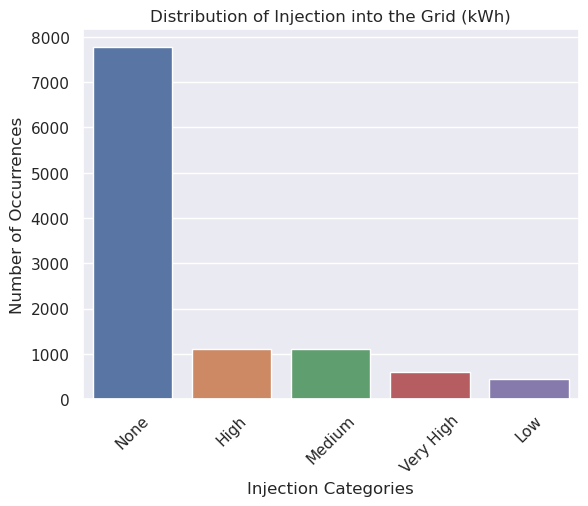

In [14]:
energia_count = data_energia['Injecao na rede (kWh)'].value_counts()
sns.set(style="darkgrid")
#sns.barplot(x=energia_count.index, y=energia_count.values, order=["None", "Low", "Medium", "High", "Very_High"])
sns.barplot(x=energia_count.index, y=energia_count.values)
plt.title('Distribution of Injection into the Grid (kWh)')
plt.xlabel('Injection Categories', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45)
plt.show()

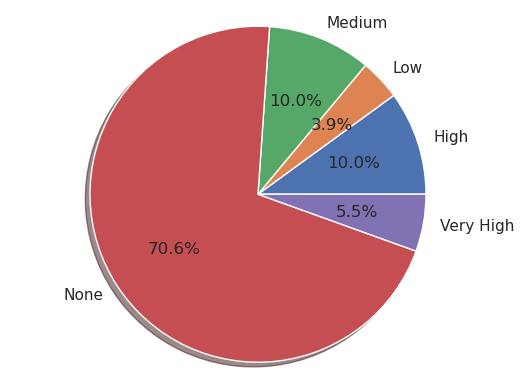

In [16]:
labels = data_energia['Injecao na rede (kWh)'].astype('category').cat.categories.tolist()
counts = data_energia['Injecao na rede (kWh)'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [13]:
# Assuming you have date columns in your dataset, you can convert them to datetime objects.
data_energia['Data'] = pd.to_datetime(data_energia['Data'])
data_meteo['dt'] = pd.to_datetime(data_meteo['dt'])